In [1]:
import torch
import torch.nn as nn

In [2]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.layer1 = nn.Linear(10, 5)
        self.layer2 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        return x

## Forward

In [3]:
model = LinearModel()
inputs = torch.randn(1, 10)
outputs = model(inputs)
print(f"- Output of the forward pass: \n{outputs}")

- Output of the forward pass: 
tensor([[0.2456]], grad_fn=<AddmmBackward0>)


## Backward pass and gradient output

In [4]:
criterion = nn.MSELoss()
targets = torch.randn(1, 1)
loss = criterion(outputs, targets)

print(f"Loss: {loss.item()}")

loss.backward()

for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"- Gradients for {name}: {param.grad}")

Loss: 0.011812232434749603
- Gradients for layer1.weight: tensor([[-0.0000, -0.0000,  0.0000, -0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000, -0.0000],
        [ 0.0501,  0.0100, -0.0108,  0.0524, -0.0248, -0.0391, -0.0633, -0.0301,
         -0.0313,  0.0061],
        [-0.0000, -0.0000,  0.0000, -0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000, -0.0000],
        [-0.0000, -0.0000,  0.0000, -0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000, -0.0000],
        [-0.0000, -0.0000,  0.0000, -0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000, -0.0000]])
- Gradients for layer1.bias: tensor([ 0.0000, -0.0471,  0.0000,  0.0000,  0.0000])
- Gradients for layer2.weight: tensor([[ 0.0000, -0.1929,  0.0000,  0.0000,  0.0000]])
- Gradients for layer2.bias: tensor([-0.2174])


## Custom passes

In [5]:
class CustomPass(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input * input

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = grad_output * 2 * input
        return grad_input

In [6]:
input = torch.randn(1, 3, requires_grad=True)
print(f"- Input: {input}")

output = CustomPass.apply(input)
print(f"- Output of the custom forward pass: {output}")

loss = output.sum()
loss.backward()
print(f"- Gradients for custom function input: {input.grad}")

- Input: tensor([[-0.2777, -1.5277,  0.9146]], requires_grad=True)
- Output of the custom forward pass: tensor([[0.0771, 2.3340, 0.8365]], grad_fn=<CustomPassBackward>)
- Gradients for custom function input: tensor([[-0.5553, -3.0555,  1.8292]])


## Computational graph

In [14]:
from torchviz import make_dot
from IPython.display import Image, display
from torchsummary import summary

Using device: cuda


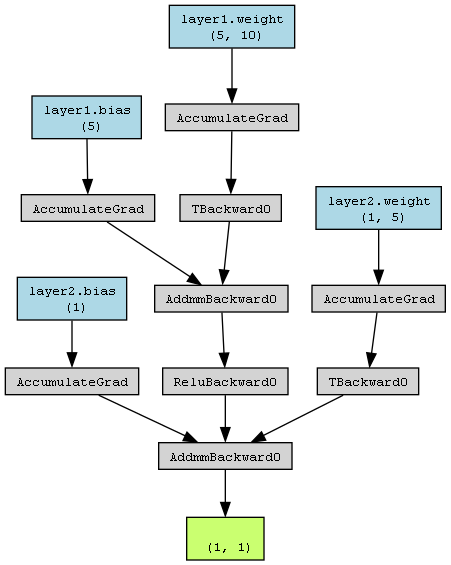

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

model = LinearModel().to(device)

inputs = torch.randn(1, 10).to(device)
outputs = model(inputs)

dot = make_dot(outputs, params=dict(model.named_parameters()))
dot.render("computational_graph", format="png")
display(Image(filename="computational_graph.png"))

In [18]:
from torchsummary import summary
summary(model, input_size=(1, 10))

print(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 5]              55
            Linear-2                 [-1, 1, 1]               6
Total params: 61
Trainable params: 61
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
LinearModel(
  (layer1): Linear(in_features=10, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)
